# GPU vs CPU: Why do you use GPU for deep learning number crunching

---

In this exercise, we are going to use TensorFlow and GPU for matrix multiplication. We will benchmark the running time for both CPUs and GPUs.

Most code is based on https://medium.com/@erikhallstrm/hello-world-tensorflow-649b15aed18c

Instructions:


* Make a copy of the notebook in your Google Drive (via the "File - Save a copy in Google Drive" option).
* rename your copy to "YourName-Copy Why GPU.ipynb"
* Select "GPU" via "Runtime - change runtime type - hardware accelerator"
* Run the notebook block by block, producing the results
* Answer the question at the bottom.
* Save the notebook by "File - Download .ipynb" to your local drive
* Make sure your results are also saved within the notebook
* Submit the sharable link to your colab notebook and the downloaded notebook to Canvas.





In [ ]:
# First, we import the right libraries
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time

# here is the main subroutine
def get_times(maximum_time):
    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(50,5000,50)
    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Now run the test
device_times, matrix_sizes = get_times(1.5)

####### Calculating on the /gpu:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7

[[12.38  12.51  11.21  ... 14.11  12.73  10.5  ]
 [11.875 11.46  11.664 ... 11.72  11.45  10.44 ]
 [13.06  11.82  10.805 ... 12.43  12.3   10.836]
 ...
 [14.67  15.28  13.914 ... 15.586 14.664 12.75 ]
 [15.04  14.13  13.66  ... 14.9   14.875 12.81 ]
 [12.72  11.625 11.086 ... 13.22  13.03  11.94 ]]
{'/gpu:0': [0.24450993537902832], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7

[[12.21   8.28  12.484 ... 11.37  11.55  11.695]
 [14.88  13.086 13.44  ... 14.01  13.96  14.16 ]
 [13.83  11.46  14.65  ... 14.24  14.445 13.445]
 ...
 [15.6   11.92  14.695 ... 13.93  15.76  13.695]
 [14.43  12.02  13.82  ... 14.3   14.    13.1  ]
 [13.04  10.93  11.91  ... 11.61

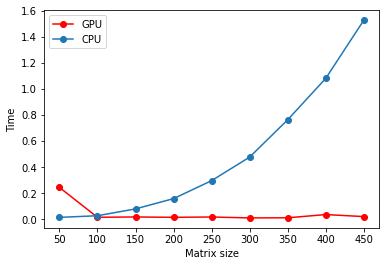

In [ ]:
# plotting
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'ro-',label='GPU')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-',label='CPU')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.legend(loc="upper left")
plt.show()
# view raw0-matrix.py hosted with ❤ by GitHub



**Now, please describe in this text box what happend and what is the conclusion in 1-5 sentences, and then save the notebook and submit it.**

From this figure above, it is obvious that when matrix size increases, GPU time remains nearly the same but CPU time is increase (seems exponenially increase). So when we have a larger dataset and larger model (e.g. neural network with many layers), obviously we should use GPU.

When matrix size is smaller than 100, we can see that GPU time is longer than CPU time, which means when we have a small dataset and small model, it is not necessary to use GPU, or in other words, using CPU will cost shorter running time.